# Matplotlib - Intro

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentnation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)

* behaves similarly to Matlab

In [2]:
import matplotlib.pyplot as plt
import numpy as np

To be efficient with **matplotlib**, you first need to understand its terminology.

## Parts of a Figure

<img src="../figures/matplotlib_figure_parts.png" style="height:90%; width:90%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

In [3]:
fig = plt.figure() # Create a figure
# axes = fig.add_subplot(111) # add one Axes to Figure

<Figure size 432x288 with 0 Axes>

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is `plt.subplots()`

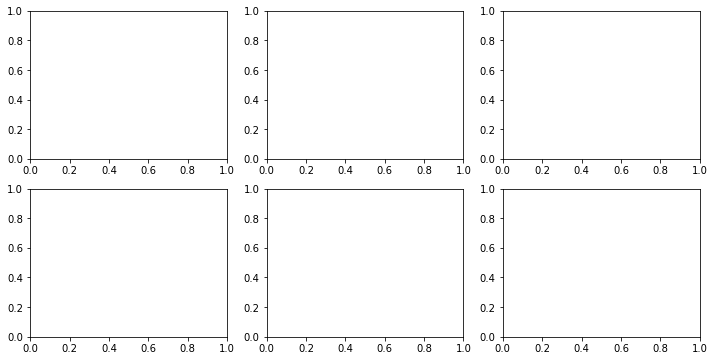

In [4]:
fig,axes = plt.subplots(2, 3, figsize=(12,6))
# This will create a figure and 6 axes arranged in 2 rows, 3 columns

---

## Line plots

Lets draw two cosine functions of different amplitude on the same **Axes**.

In [5]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True) # NB. endpoint=True is default option
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

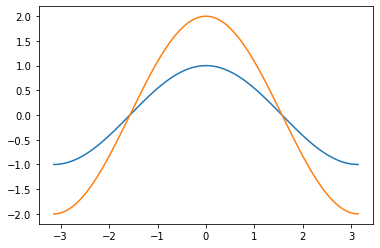

In [6]:
# Plot data
fig, axes = plt.subplots() # calling subplots without any arguments creates a one axes by default
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed.

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 0 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their effect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

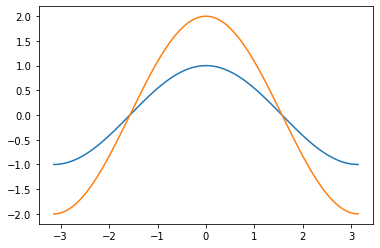

In [7]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=1.5, linestyle='-',alpha=1.)
axes.plot(X, Y2, color='C1', linewidth=1.5, linestyle='-',alpha=1.);

In [8]:
# Your code here

**Exercise 1 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use `axes.set_xticks()` and `axes.set_xticklabels()`.

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**. format strings in LaTeX by prepending 'r'ie `axes.set_xticklabels([r'$\pi$'])`

In [9]:
# Youd code here

**Exersise 2 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**.

In [10]:
# Your code here

**Exercise 3 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [11]:
# Your code here

---

## Bar plots

Bar plots are created in much the same way as line plots, with two arrays of equal size.

Here we use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: **monthly mean** NAO index since January 1950 til March 2019.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

### Read NAO data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function. 

In [12]:
#np.loadtxt() # To see options, hit Shift+Tab+Tab within the brackets

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

In [13]:
nao_yr, nao_mn, nao_val = np.loadtxt('../data/nao_monthly.txt', unpack=True) # read year, month, values

`unpack = True` allows us to assign a different variable for each column. 

NB. Alternative ways to load/read text files will be covered in the pandas section later...

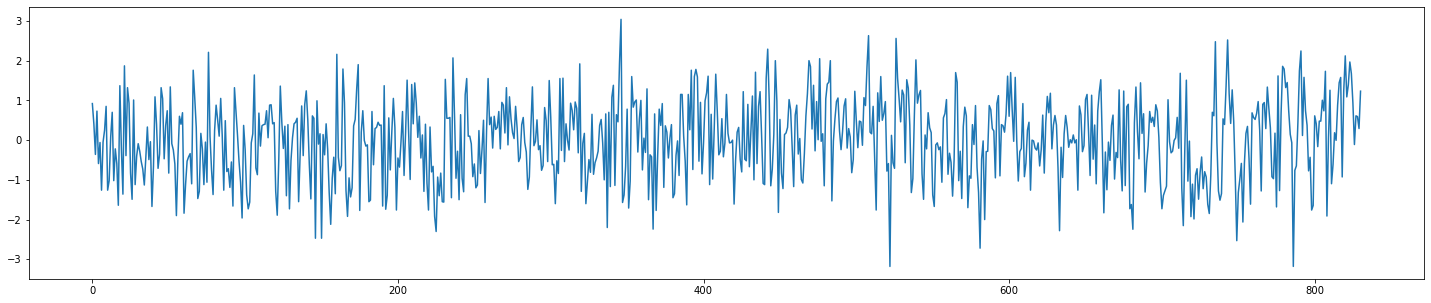

In [14]:
# Quick look at the NAO values
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice the `nao_val` array accordingly.

In [15]:
# Slicing
nao_val_sub = nao_val[-12*5:] # extract last 12 months * 5 years

In [16]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

NB. More on how to create actual date labels later... 

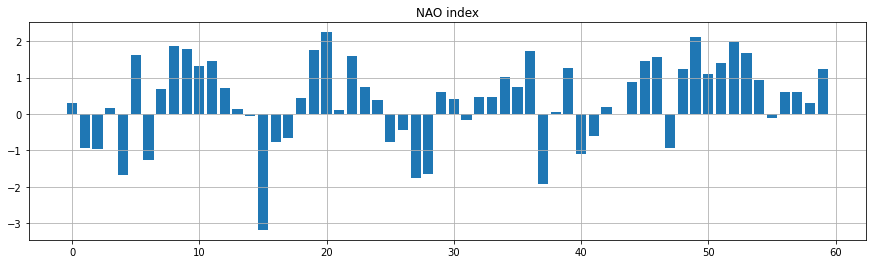

In [17]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time,nao_val_sub) # NB. different to plot() in that time/position variable is needed. 
ax.set_title('NAO index')
ax.grid(True)

---

## Scatter plots

* Display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
  * Useful for non-gridded or irregularly sampled data

* Option to colorcode or size the data points to display an additional variable

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [18]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

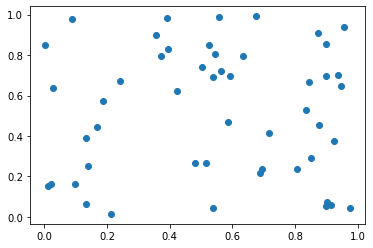

In [19]:
# Plot simple scatter
plt.scatter(x, y);

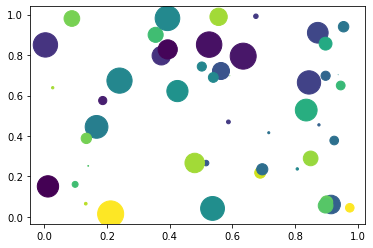

In [20]:
# scatter showing different area and color
plt.scatter(x, y, s=area, c=colors);

---

## Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

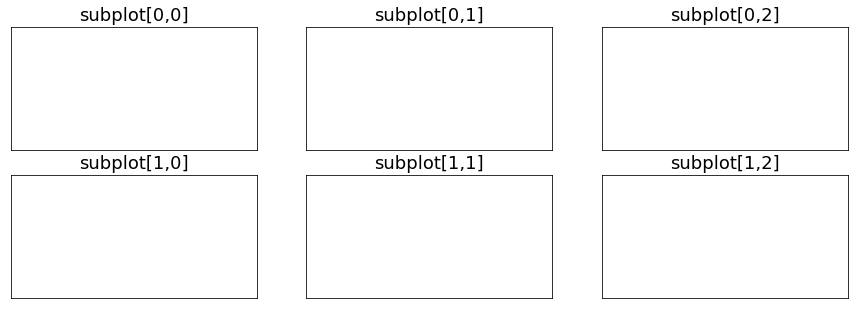

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.flat: # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

### Subplots with real data

To practice our plotting we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$) and methane ($CH_4$) 

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

|Station code | Year | Month | Measurement|
| :------------- | :----------: | :----------|  :---------- |
|CGO       |     1984   |  4  |     341.63  |

#### Read data from a text file

In [22]:
data = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
data

array([[1984.  ,    4.  ,  341.64],
       [1984.  ,    5.  ,  341.73],
       [1984.  ,    6.  ,  342.  ],
       ...,
       [2018.  ,   10.  ,  406.11],
       [2018.  ,   11.  ,  405.84],
       [2018.  ,   12.  ,  405.59]])

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [23]:
year, month, value = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3), unpack=True)

#### Kwargs

* remember from earlier, you can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [24]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [25]:
# Read data
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('../data/co2_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('../data/ch4_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('../data/ch4_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)


We'll find out how to properly plot on a time axis soon! For now, create dummy time arrays by some arithmetic to numpy arrays.

In [26]:
cgo_co2_time_dummy = cgo_co2_yr*12 + cgo_co2_mn
mhd_co2_time_dummy = mhd_co2_yr*12 + mhd_co2_mn
cgo_ch4_time_dummy = cgo_ch4_yr*12 + cgo_ch4_mn
mhd_ch4_time_dummy = mhd_ch4_yr*12 + mhd_ch4_mn

**Exercise 4a (20 mins)**. Construct two subplots using the arrays created above. One for $CO_2$, one for $CH_4$. Add titles, x and y labels, legend. If you have time left, play with optional arguments of `plot()`. 

The desired outcome is something like this (time on x axis will follow in part b):

<img src="../figures/subplots_example.png">

In [16]:
# Your code here

**Hint:** You can run the following cell for a partial solution to start from: 

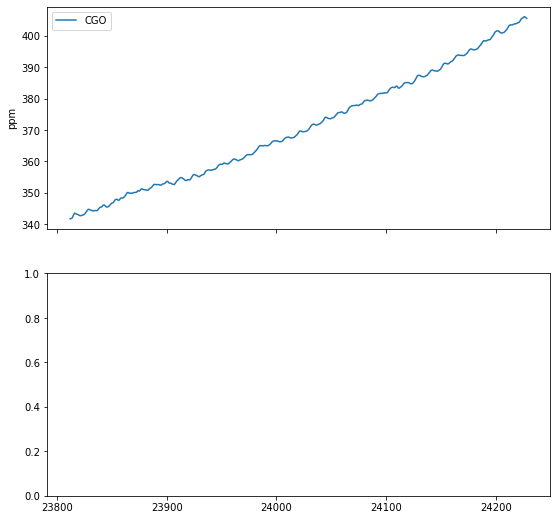

In [27]:
# create the figure and desired subplot axes arrangement:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9,9), sharex=True)

# plot data on the first subplot:
axes[0].plot(cgo_co2_time_dummy, cgo_co2_val, label='CGO')

# add a label for the Y axis:
axes[0].set_ylabel('ppm')

# add a legend (this uses the "label" specified when plotting)
axes[0].legend();

#### Datetime

* `datetime` module helps to work with time arrays

In [30]:
from datetime import datetime

In [31]:
datetime.now()

datetime.datetime(2021, 6, 3, 10, 16, 35, 720805)

In [32]:
a_date = datetime(2019, 5, 23)
a_date

datetime.datetime(2019, 5, 23, 0, 0)

In [33]:
python_course_dates = [datetime(2021, 6, i) for i in [7,8,9,10,11]]
python_course_dates

[datetime.datetime(2021, 6, 7, 0, 0),
 datetime.datetime(2021, 6, 8, 0, 0),
 datetime.datetime(2021, 6, 9, 0, 0),
 datetime.datetime(2021, 6, 10, 0, 0),
 datetime.datetime(2021, 6, 11, 0, 0)]

**More on datetime in notebook 16**

Let's apply it to our year and month arrays.

In [34]:
# Using list comprehension
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

In [35]:
# Same as in previous cell but using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

In [36]:
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

<b>Exercise 4b (5 min).</b> Improve your solution to exercise 4a by using the newly constructed datetime lists. Note how matplotlib understands the datetime format!

In [4]:
# your code here

---
---

## Plotting 2D data: contour (and contourf) plots

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

In [ ]:
# Generate some data
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
# Create a (x,y) grid
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y) # repeat x y times and y x times

In [ ]:
# Plot contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10);
ax2.contourf(X, Y, f(X,Y), 10);
# ax3.contour(X, Y, f(X,Y), 10, colors='k');
# ax3.contourf(X, Y, f(X,Y), 10);

### How to add a colorbar?

The **colorbar** has to have its own **Axes**!

This is created by adding a colorbar to the figure, telling matplotlib which plotted values to use for the colorbar content with `fig.colorbar(mappable, ax=ax_no)`

In [ ]:
# Plot contour and contourf with colorbars
# By default matplotlib contours negative values with a dashed line. This behavious can be changed with rcparams:
#plt.rcParams['contour.negative_linestyle']= 'solid' # Reset to default with `= 'dashed'`

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);


### Choose your colormap wisely

More info here, [colormaps reference](https://matplotlib.org/examples/color/colormaps_reference.html).

<img src="../figures/colormaps_reference_00.png">  
<img src="../figures/colormaps_reference_03.png">

### Public service announcement: don't let bad colourmaps mess with your science! 
**Jet has no place in the 21st century**. Also referred to as rainbow, jet is an [awful colormap](http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/) that promotes [bad science](https://blogs.egu.eu/divisions/gd/2017/08/23/the-rainbow-colour-map/). The distortions caused by these colour maps has been [widely](www.fabiocrameri.ch/resources/PosterScientificColourMaps_Crameri.pdf) [documented](https://academic.oup.com/icesjms/article/77/2/826/5684813). Python ships with great perceptually uniform default colormaps (shown above). If they're not quite what you want, check out these great custom colourmaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [general scientific visualisation/geophysics](http://www.fabiocrameri.ch/colourmaps.php). 

To make sure everyone can appreciate your beautiful figures, you can use a color blindness simulator such as [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/). 

## How to save a figure?

Matplotlib supports exporting to a large range of vector and raster image formats:

In [ ]:
fig.canvas.get_supported_filetypes()

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)` to save your figure:

In [ ]:
# Save contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

# fig.savefig('../figures/MY_AWESOME_FIGURE.png', dpi=300, facecolor='moccasin', bbox_inches='tight')

---
---

## Combined figures 
In this final example we will produce a compact, combined figure useful for data comparison and for journals with tight figure limits

In [ ]:
# Making a grid of temperature data with meshgrid

delta1 = 0.025
x1 = np.sin(np.arange(np.pi / 4, 3 * np.pi / 4, delta1))
y1 = 10**np.arange(0, 1, delta1/10)-1
X1, Y1 = np.meshgrid(x1, y1)
temp = X1 * Y1
distance = np.linspace(0, 90, len(x1))
depth = np.linspace(100,1,len(y1))

In [ ]:
# Make a 2X2 set of Axes with shared x axis and y axis
fig, axs = plt.subplots(2,2,figsize=(8, 8),sharex="col",sharey="row",
    gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
# gridspec_kw makes Axes with different height and width ratios

# Remove all whitepace between Axes
fig.subplots_adjust(hspace=0, wspace=0)

# Makes axs into a flat array, easier to call
axs = axs.ravel()


# Plotting the surface temperature and mean temp depth profile alongside the contour plot of temp
axs[0].plot(distance, temp[-1, :], label="surface temp")
axs[2].contourf(distance, depth, temp,10)
axs[3].plot(np.nanmean(temp, 1), depth)

# Setting limits to make the plot tight
axs[2].set(xlim=[distance[0], distance[-1]], ylim=[depth[0], depth[-1]])
axs[3].set(xlim=[np.min(temp), np.max(temp)]);

In [ ]:
# Increasing the font size to improve readability
plt.rcParams.update({"font.size": 20})

fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex="col", sharey="row",
                        gridspec_kw={"height_ratios": [1, 4], "width_ratios": [4, 1]})
fig.subplots_adjust(hspace=0, wspace=0)
axs = axs.ravel()

axs[0].plot(distance, temp[-1, :])
p1 = axs[2].contourf(distance, depth, temp,10, cmap='magma')
axs[3].plot(np.nanmean(temp, 1), depth)

# Add a colorbar to the right of the bottom right plot
fig.colorbar(ax=axs[3], mappable=p1, label=r"Temperature $\mathrm{^{\circ}C}$")

# Remove the lines and ticks from the unused top right axis
axs[1].axis("off")

# Addding labels and limits
axs[0].set(ylabel='Surface\n temp')
axs[2].set(
    xlim=[distance[0], distance[-1]],
    ylim=[depth[0], depth[-1]],
    ylabel="Depth (m)",
    xlabel="Distance (km)")
axs[3].set(xlim=[np.min(temp), np.max(temp)], xlabel="mean temp");

## Final matplotlib exercise (40 mins)

Reproduce the figure below by using `contourf()` for modelled sea surface temperature and `plot()` for a zonally averaged temperature curve. The observational dataset is given below. The code for loading and reshaping modelling data is written for you (using `np.genfromtxt()`), as well as calculating the zonally averaged temperature

![](../figures/matplotlib_map.png)

Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (longitude by latitude).

Total Number of Records: 64980.

In [ ]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10, missing_values='-1.E+34', usemask=True, usecols=(2, 3, 4), unpack=True)
# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)))
# Average the temperature zonally here
temp_merid_mean = np.nanmean(sst,1);

In [ ]:
# Your code here

## This is a lot to remember though

Don't try to memorise it! Instead, download these excellent matplotlib cheatsheets

https://github.com/matplotlib/cheatsheets

Print them out to pin next to your monitor or keep the pdfs handy.

---------------------
### Bonus: styles with matplotlib

Matplotlib has a number of predefined styles that affect default colours, backgrounds, linewidths, font sizes etc.

You can display all available default styles with the following code

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

You can use these styles individually, using the context manager `with plt.style.context('desired-style'):` then indenting your plotting code

In [ ]:
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

In [ ]:
with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots()
    axes.plot(X, Y1, label='cos(x)');
    axes.plot(X, Y2, label='2cos(x)');

    axes.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]);
    axes.set_yticks([-2, -1, 0, 1, 2]);
    axes.set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$+\pi/2$', '$+\pi$']);
    axes.legend(loc='upper left', frameon=False);
    point = np.pi/4
    axes.plot(point, 2*np.cos(point), marker='o');
    axes.annotate(r'$2\cos(\frac{\pi}{4})=\sqrt{2}$', xy=(point, 2*np.cos(point)), xytext=(1, 1.5), fontsize=16);

One of these style is based on the inimitable xkcd comics 

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

## References: 
General matplotlib
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* https://matplotlib.org/gallery/showcase/xkcd.html#sphx-glr-gallery-showcase-xkcd-py


Colourmaps 
* http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/
* https://blogs.egu.eu/divisions/gd/2017/08/23/the-rainbow-colour-map/
* www.fabiocrameri.ch/resources/PosterScientificColourMaps_Crameri.pdf) 
* https://academic.oup.com/icesjms/article/77/2/826/5684813
* cmocean colourmaps for Python (https://matplotlib.org/cmocean/) 
* cmcrameri colourmaps for Python https://github.com/callumrollo/cmcrameri